In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [121]:
df=pd.read_csv('Titanic_data.csv')

# 1. How big is your data

In [122]:
df.shape

(418, 12)

# 2. How does the data look like

In [123]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
276,1168,0,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S
113,1005,1,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
361,1253,1,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C


In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. what is the data type of cols

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# 4. Are there any missing values?

In [126]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 5. how does the data look mathematically 

In [127]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 6. Are there any duplicate values

In [128]:
df.duplicated().sum()

0

# How is the correlation between cols

In [129]:
# df.corr()['Survived'] 

# EDA (univariate analysis)

In [130]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Categorical data
## 1. Count plot

Survived
0    266
1    152
Name: count, dtype: int64

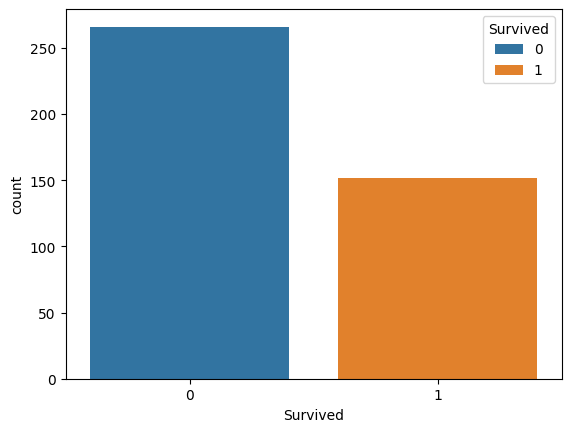

In [131]:
# df1=pd.read_csv('titanic.csv')
sns.countplot(x=df['Survived'],data=df,hue=df['Survived'])
df['Survived'].value_counts()

<Axes: xlabel='Pclass', ylabel='count'>

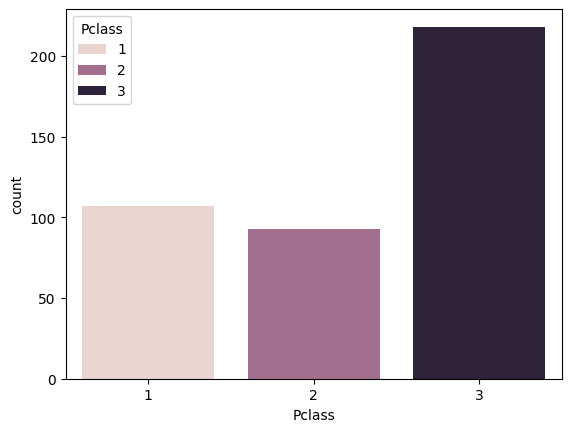

In [132]:
sns.countplot(x=df['Pclass'],data=df,hue=df['Pclass'])

<Axes: ylabel='count'>

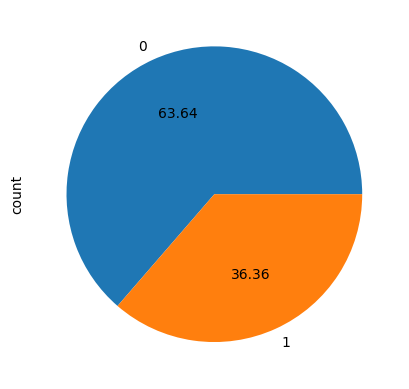

In [133]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

# 2. Numerical data
## histogram

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

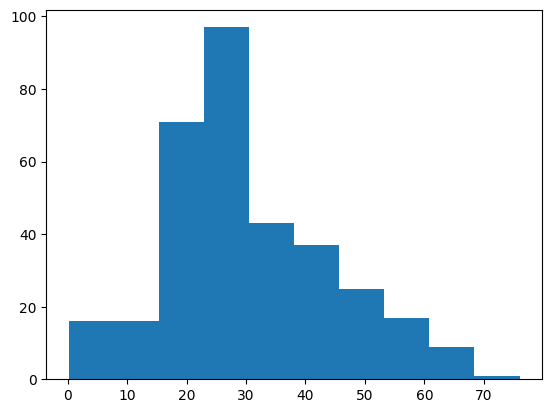

In [134]:
plt.hist(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

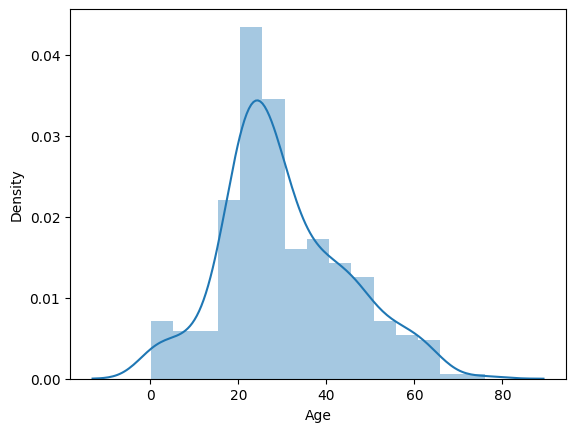

In [135]:
sns.distplot(df['Age'])

# Boxplot

<Axes: ylabel='Fare'>

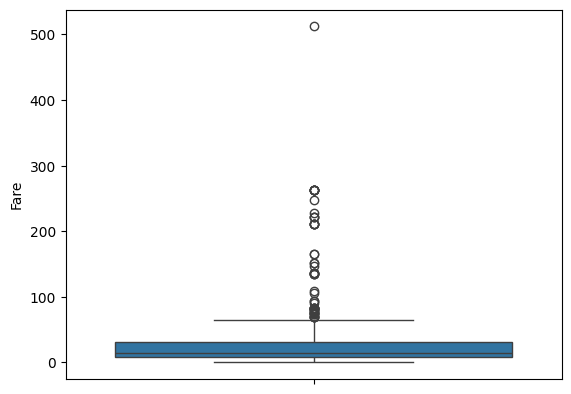

In [136]:
sns.boxplot(df['Fare'])

In [137]:
titanic=df.copy()

In [138]:
tips=sns.load_dataset('tips')

In [139]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [140]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatterplot (Numerical-Numerical

<Axes: xlabel='total_bill', ylabel='tip'>

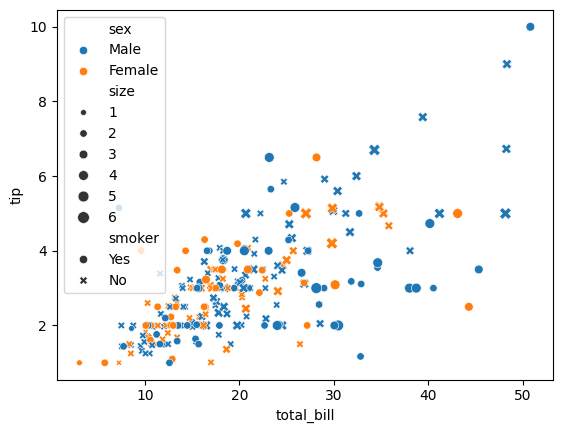

In [144]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],data=tips,hue=tips['sex'],style=tips['smoker'],size=tips['size'])  # mulitvariate analysis 5 columns

# Barplot (Numerical-Categorical)

In [145]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

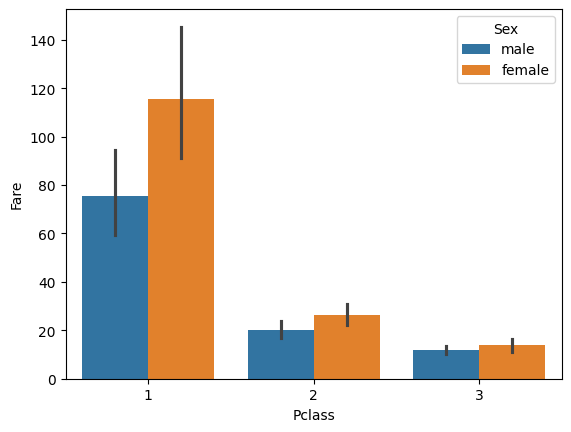

In [146]:
sns.barplot(x=titanic['Pclass'],y=titanic['Fare'],hue=titanic['Sex'])

# Box plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

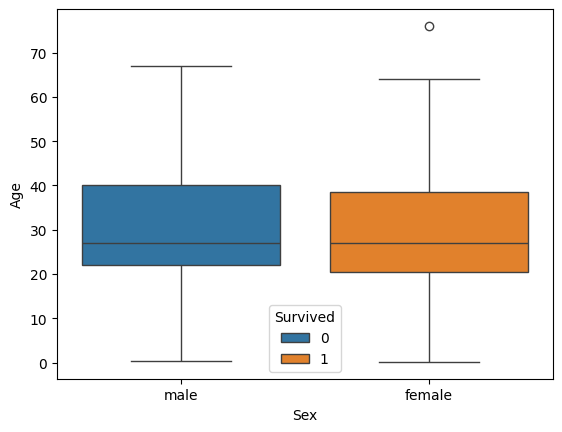

In [147]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

# Dist plot (numrical -  Categorical)

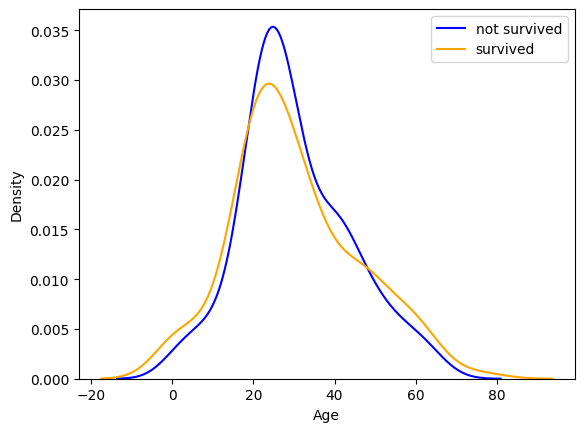

In [148]:
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False,color='b',label='not survived')
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False,color='orange',label='survived')
plt.legend()

# Heatmap (Categorical - categorical)

In [149]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


<Axes: xlabel='Survived', ylabel='Pclass'>

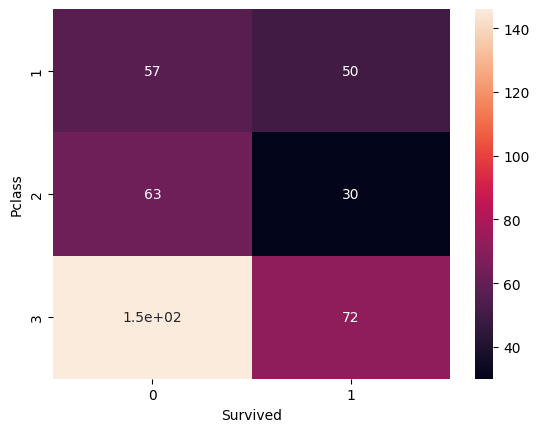

In [150]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']),annot=True)

In [154]:
titanic.groupby('Pclass')['Survived'].mean()*100

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

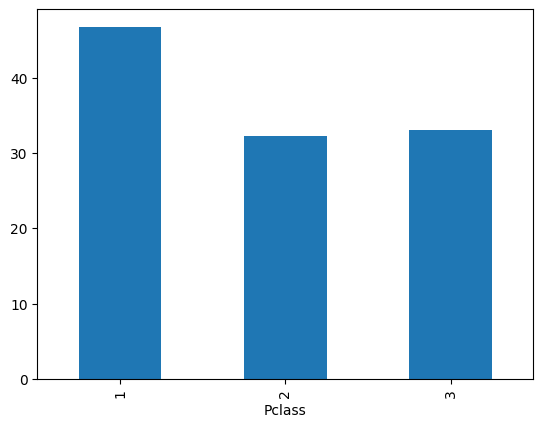

In [156]:
(titanic.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

# Clustermap (categorical - categorical)

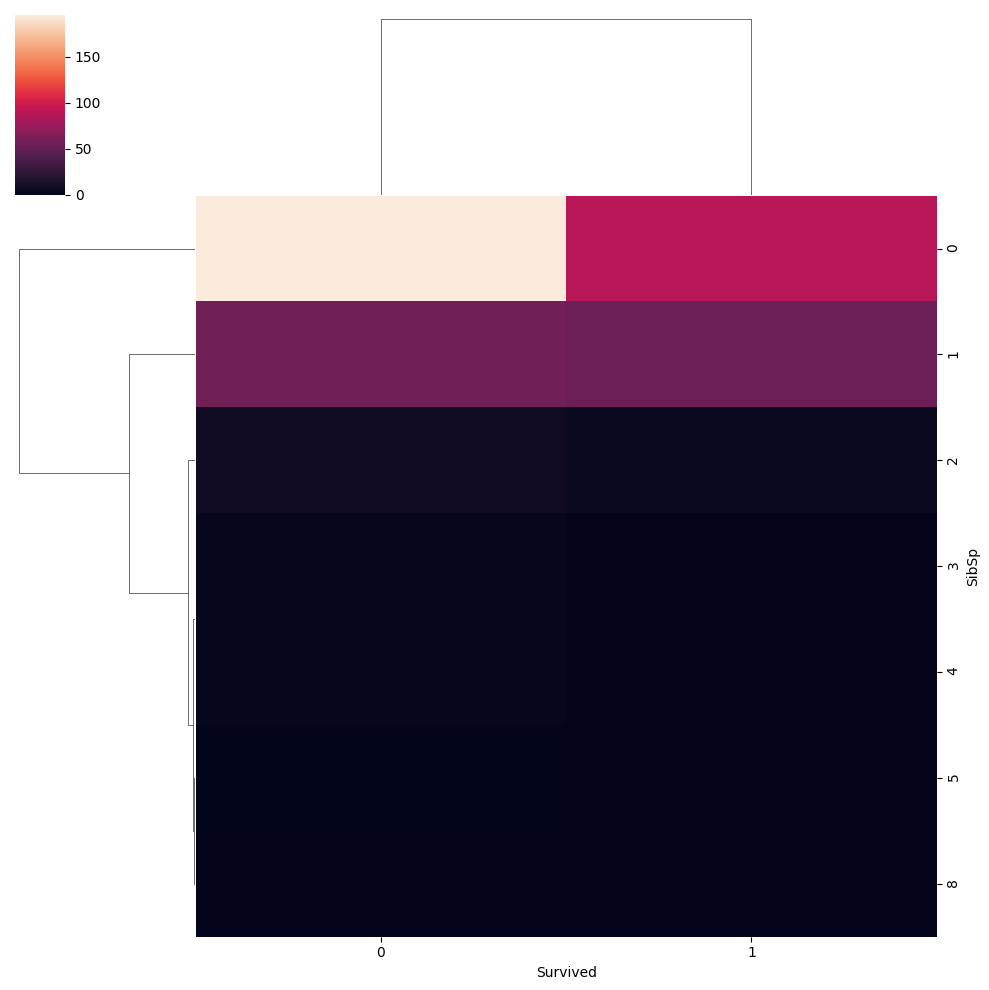

In [161]:
sns.clustermap(pd.crosstab(titanic['SibSp'],titanic['Survived']))

# Pairplot

In [162]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


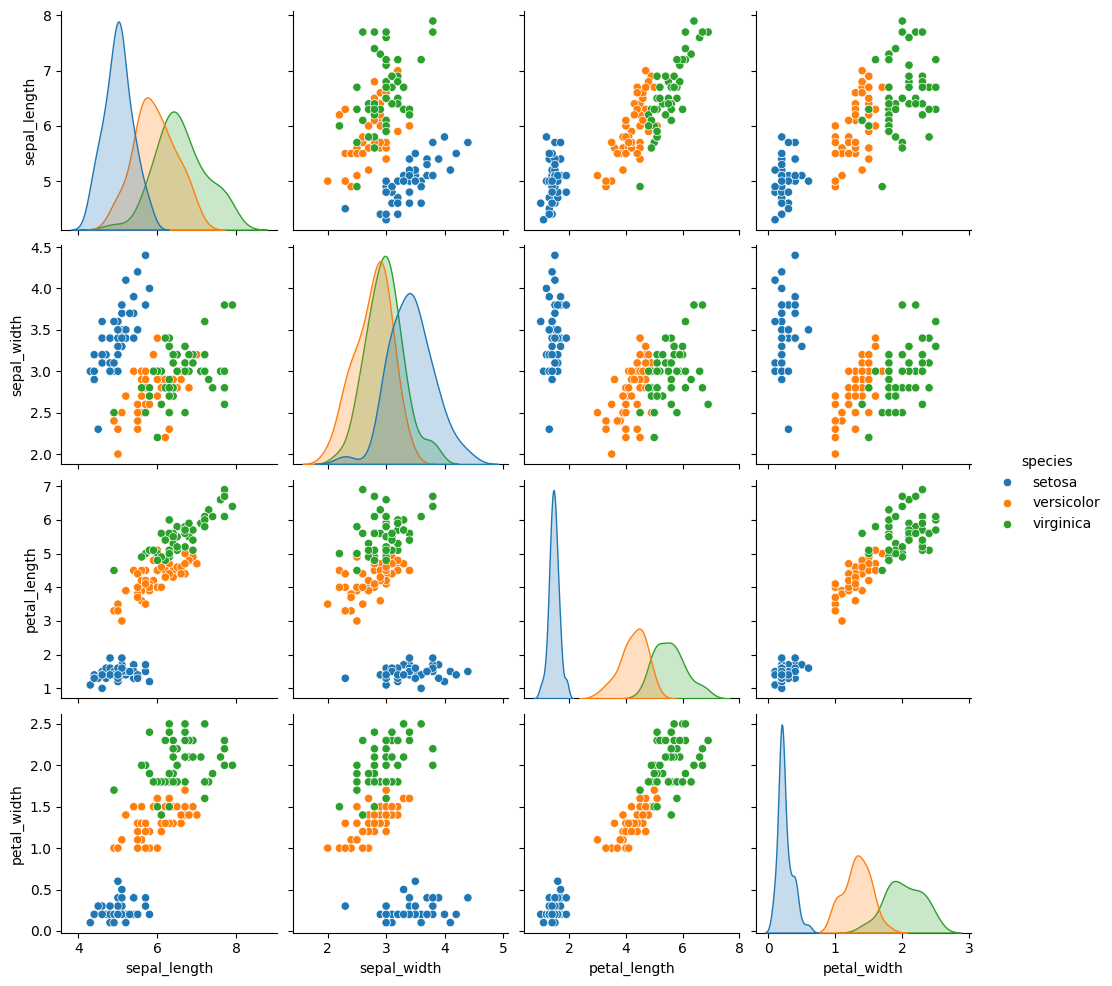

In [165]:
sns.pairplot(iris,hue='species')

# lineplot (Numerical - Numerical)

In [166]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [185]:
new=flights.groupby('year').sum('passengers').reset_index()
new.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


<Axes: xlabel='year', ylabel='passengers'>

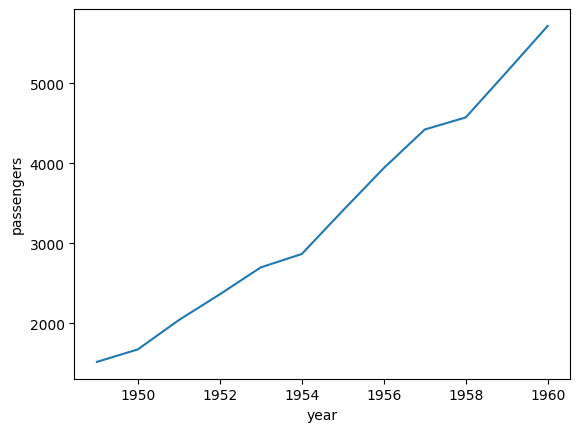

In [186]:
sns.lineplot(x='year',y='passengers',data=new)

In [187]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0
